## AM41DP - Data Science Programming Assignment 

#### Submitted by JAYESH MANJUNATH 
STUDENT ID: 200196404

We use two datasets in this course work which contains information describing B-cell epitopes of 18 columns and 10 columns of other dataset contains information about approximately 14,000 proteins
that are related to several pathogens.

In [1]:
## Importing required packages
import pandas as pd
import numpy as np

In [2]:
## Reading Dataset1 (Sp_epitopes.csv)
epi = pd.read_csv("Sp_epitopes.csv")
print("Dimensions : Rows and Columns",epi.shape)

Dimensions : Rows and Columns (7105, 18)


In [3]:
## Reading Dataset2 (protiens.csv)
pro = pd.read_csv("proteins.csv")
print("Dimensions : Rows and Columns",pro.shape)

Dimensions : Rows and Columns (14194, 10)


###### M2 - Adequately join the protein sequences onto the epitopes table

In [4]:
##joining the protein sequences onto the epitopes table 
df_merge = pd.merge(epi, pro, left_on='protein_id', right_on='UID', how='left')
print("Dimensions : Rows and Columnss",df_merge.shape)

Dimensions : Rows and Columnss (7105, 28)


###### M3 - Remove invalid observations: 

M3 (i) Those without corresponding protein sequences:

In [5]:
df_merge = df_merge.dropna(subset = ['TSeq_seqtype'])
df_merge.shape

(7100, 28)

###### M3 (ii) Those for which the epitope substring is not located in the correct position of the protein string (based on start_pos and end_pos);

In [6]:
df_merge['epit_seq_actual'] = df_merge.apply(lambda x: x['TSeq_sequence'][x['start_pos']-1:x['end_pos']], axis=1)
df_merge = df_merge[df_merge['epit_seq'] == df_merge['epit_seq_actual']]
df_merge.shape

(7094, 29)

###### M3 (iii)  Those with start_pos < 8 or with end_pos > (TSeq_length – 8)

In [7]:
for i in df_merge.index:
    if df_merge.loc[i,'start_pos'] < 8 or (df_merge.loc[i,'end_pos'] > df_merge.loc[i,'TSeq_length'] - 8):
        df_merge.drop(i, inplace=True)
df_merge.shape

(6826, 29)

###### M3 (iv) Those containing any non-specific aminoacid letters (namely B,J,X or Z) in the epitope sequence.


In [8]:
for i in df_merge.index:
    if "B" in df_merge.loc[i,'epit_seq'] or "J" in df_merge.loc[i,'epit_seq'] or "X" in df_merge.loc[i,'epit_seq'] or "Z" in df_merge.loc[i,'epit_seq'] :
        df_merge.drop(i, inplace=True)
df_merge.shape

(6826, 29)

###### M4 - Calculate the Class attribute for this data set based on the number of positive and negative assays (if n_Positive >= n_Negative then Class = 1, otherwise Class = 0)

In [9]:
df_merge['Class'] = df_merge['n_Positive'] >= df_merge['n_Negative']
df_merge['Class'] = df_merge.Class.astype(int)
#getting last 5 rows
df_merge[['n_Positive', 'n_Negative', 'Class']].tail()

,n_Positive,n_Negative,Class
7098,1,0,1
7100,0,1,0
7101,4,0,1
7103,1,0,1
7104,0,1,0


###### M5 - Develop high-quality visualisations of the main characteristics of the resulting joined dataset. The minimal requirement here is


In [10]:
import matplotlib as plt
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt # Pyplot is such a general function that it deserves its own alias
# Make your plot outputs appear and stored within the notebook
%matplotlib inline

###### M5 (i) A graphical investigation of Class balance.

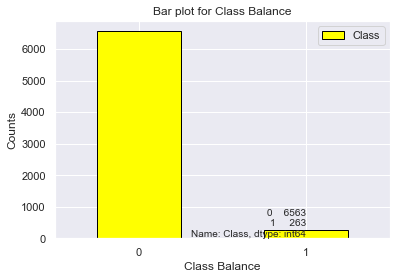

In [11]:
class1 = df_merge.Class.value_counts()
class1.plot.bar(x='ClassBalance', y='Counts', rot=0, color='yellow', edgecolor='black')
plt.xlabel("Class Balance")
plt.ylabel("Counts") 
plt.title("Bar plot for Class Balance")
plt.text(1,0,str(class1), ha='right', va='bottom', fontsize=10)
plt.legend()


The Bar Plot represents the Balance of Positive Class - [Class_1] and Negative - Class [Class_0] respectively. It is clear from Bar plot that we have 6563 number of negative classes and 263 number of positive classes.

###### M5 (ii) a graphical investigation of the distribution of epitope lengths.

(array([1.000e+00, 6.000e+00, 6.784e+03, 3.400e+01, 1.000e+00]),
 array([ 5, 10, 15, 20, 25, 30]),
 <BarContainer object of 5 artists>)

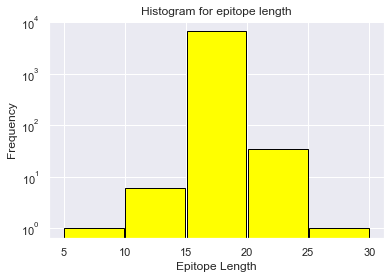

In [12]:
#df_merge[['epit_seq']].head() --- getting epit_seq column
df_merge['epitope_len'] = df_merge.epit_seq.str.len()
plt.xlabel("Epitope Length")
plt.ylabel("Frequency") 
plt.title("Histogram for epitope length")
plt.hist(df_merge.epitope_len, bins=[5,10,15,20,25,30], rwidth=0.98, color='yellow', edgecolor='black', log='True')

The above Histogram represents plotting the distributions of epitope length, the length of Epitope in histogram is represented on x-axis, the range of length is grouped in each bins.


##### M5 (iii) A grouped bar chart of the frequencies (%) of each aminoacid letter in Positive vs Negative observations. 

<AxesSubplot:title={'center':'Frequencies (%) of each aminoacid letter'}, ylabel='Aminoacid Letters'>

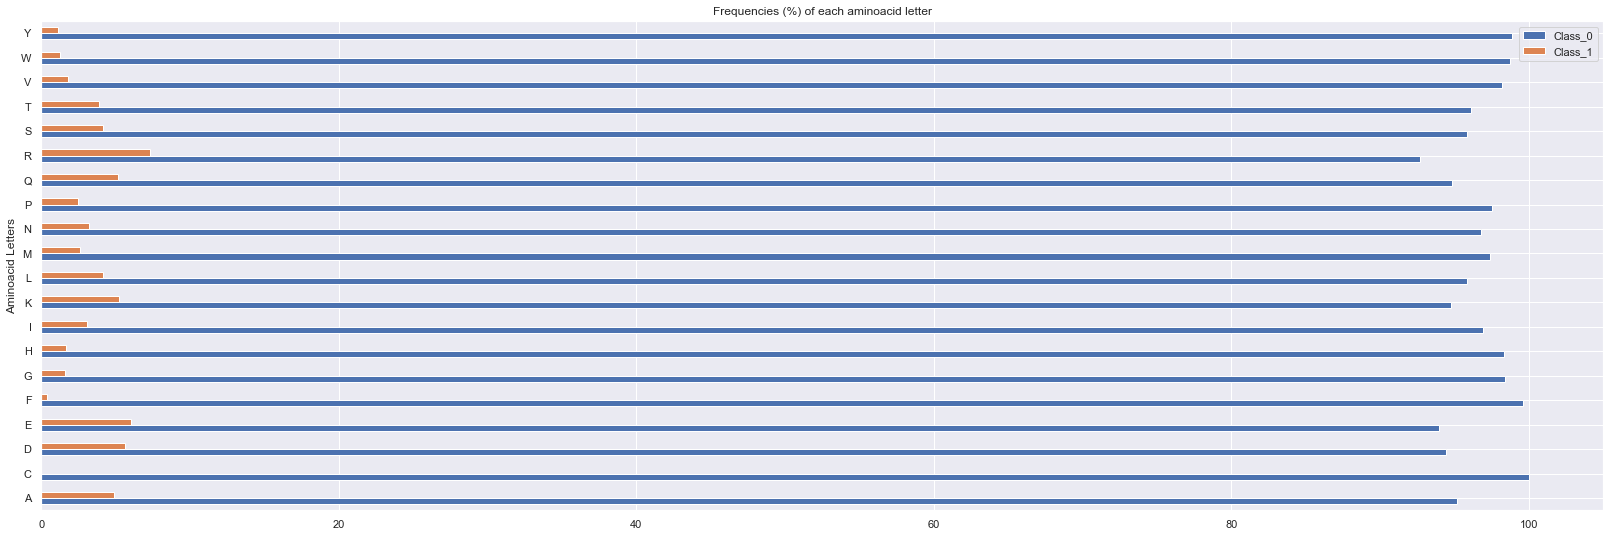

In [13]:
#importing the required library
from collections import Counter

dataset1 = pd.DataFrame.from_dict(Counter("".join(df_merge.epit_seq)), orient='index').reset_index()
dataset2 = pd.DataFrame.from_dict(Counter("".join(df_merge[df_merge['Class']==0]['epit_seq'])), orient='index').reset_index()
dataset3 = pd.DataFrame.from_dict(Counter("".join(df_merge[df_merge['Class']==1]['epit_seq'])), orient='index').reset_index()
dataset1 = dataset1.rename(columns={'index':'char', 0:'count'}).sort_values(by=['char'])
dataset2 = dataset2.rename(columns={'index':'char', 0:'Class_0'}).sort_values(by=['char'])
dataset3 = dataset3.rename(columns={'index':'char', 0:'Class_1'}).sort_values(by=['char'])
dataset = pd.merge(pd.merge(dataset1,dataset2,how="left",on="char"),dataset3,how="left",on="char").fillna(0)
dataset["Class_0"] = round((dataset['Class_0']/dataset['count'])*100,2)
dataset["Class_1"] = round((dataset['Class_1']/dataset['count'])*100,2)
dataset = dataset.set_index('char')
dataset = dataset.drop('count',axis = 1)
dataset.plot(kind = "barh", title="Frequencies (%) of each aminoacid letter", xlabel="Aminoacid Letters",figsize=(28,9), rot=0)



The above grouped horizontal bar chart focusing on each aminoacid letters describing how much percentage an each aminoacid letters can occur in Positive Class - [Class_1] and Negative - Class [Class_0] respectively.

#### M6 - Based on the resulting data set of (M1)-(M3), assemble an expanded data set, such that each aminoacid of each epitope sequence is represented in an individual row. This expanded data set must have a new variable called AA_window , containing a substring of length 15 centred on the specific aminoacid. 

In [14]:
expanded_dataset = pd.DataFrame(df_merge.values.repeat(df_merge['end_pos'] - df_merge['start_pos']+1, axis=0), 
                                columns= df_merge.columns)
expanded_dataset['AA_position'] = expanded_dataset.groupby('epit_seq').cumcount() + expanded_dataset['start_pos']
expanded_dataset['new_start_pos'] = expanded_dataset['AA_position']-7
expanded_dataset['new_end_pos'] = expanded_dataset['AA_position']+7
expanded_dataset['AA_window'] = expanded_dataset.apply(lambda x: x['TSeq_sequence'][x['new_start_pos']-1:x['new_end_pos']], 
                                                       axis=1)
expanded_dataset = expanded_dataset[['protein_id', 'epitope_id', 'AA_position', 'AA_window', 'Class']]
expanded_dataset.shape

(102659, 5)

#### S1. Report the class imbalance of the expanded data set. 

In [15]:
num_negative = expanded_dataset.loc[expanded_dataset['Class'] == 0]
num_negative.shape

(98559, 5)

In [16]:
num_pos = expanded_dataset.loc[expanded_dataset['Class'] == 1]
num_pos.shape

(4100, 5)

In [17]:
num_positive = num_negative.sample(n=round(num_pos.shape[0] * 1.5))
num_positive.shape

(6150, 5)

In [18]:
balanced_dataset = num_pos.append(num_positive, ignore_index=True)
balanced_dataset.shape

(10250, 5)

##### S2 . Calculation of features related to the letters in the AA_window
     sequences calculated in (M5):
        - 20 features for the frequency of each individual letter;
        - 400 features related to the frequency of each possible pair of letters.

In [19]:
import string
for i in list(string.ascii_uppercase):
    balanced_dataset[i] = balanced_dataset.AA_window.str.count(i).div(15).round(2)
balanced_dataset.drop(['B','J', 'O', 'U','X','Z'], axis=1, inplace = True)
balanced_dataset.shape

(10250, 25)

In [20]:
import itertools
from itertools import product
alphabets = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
keywords = [''.join(i) for i in itertools.product(alphabets, repeat = 2)]
for i in list(keywords):
    balanced_dataset[i] = balanced_dataset.AA_window.str.count(i).div(400).round(2)
balanced_dataset

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)


C:\Users\jayes\AppData\Local\Temp/ipykernel_11560/422138394.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  balanced_dataset[i] = balanced_dataset.AA_window.str.count(i).div(400).round(2)


In [21]:
balanced_dataset.shape

(10250, 425)

###### S3 . Splitting of the expanded dataset into training (80%) and testing (20%) set based on the protein_id value

In [22]:
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(train_size=.80, n_splits=2, random_state =0)
split = splitter.split(balanced_dataset, groups=balanced_dataset['protein_id'])
train_X, test_y = next(split)

train = balanced_dataset.iloc[train_X]

test = balanced_dataset.iloc[test_y]

In [23]:
train.shape

(7093, 425)

In [24]:
test.shape

(3157, 425)

In [25]:
train = train.drop(['protein_id','epitope_id','AA_position','AA_window'], axis =1)
test = test.drop(['protein_id','epitope_id','AA_position','AA_window'], axis =1)

In [26]:
train.shape

(7093, 421)

In [27]:
test.shape

(3157, 421)

In [28]:
X_train = train.iloc[:, 1: ]
y_train = train.iloc[:, :1]
y_train = y_train.astype('int')
X_test = test.iloc[:, 1: ]
y_test = test.iloc[:, :1]
y_test = y_train.astype('int')

##### S4. Fit a classification model using the training set and report the model’s predictive performance. 

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
#Classification Model - creating object called 'model'
model = LogisticRegression()

In [31]:
#Training the model
model.fit(X_train,y_train.values.ravel())

LogisticRegression()

In [32]:
#Predicting on our test dataset
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

##### Accuracy of the model

In [33]:
model.score(X_train,y_train)

0.7904976737628648

In [34]:
#Predicting the probability of our test dataset
model.predict_proba(X_test)

array([[0.57393252, 0.42606748],
       [0.49008007, 0.50991993],
       [0.56302462, 0.43697538],
       ...,
       [0.56602957, 0.43397043],
       [0.9124014 , 0.0875986 ],
       [0.5854818 , 0.4145182 ]])

#### C1. Calculate additional features after (S2):
#### i) Shannon entropy of AA_window.

In [35]:
letters = list(expanded_dataset.AA_window)

import math
from collections import Counter

def shannon_entropy(letters):
    length = float(len(letters))
    return -sum(map(lambda x: (x/length) * math.log2(x/length), Counter(letters).values()))

expanded_dataset['shannon_entropy'] = expanded_dataset['AA_window'].map(shannon_entropy)

In [36]:
expanded_dataset.shape

(102659, 6)

##### C1. ii) TMM and MHI of AA_window


In [37]:
import pandas as pd

mass = {'A' : 89, 'R' : 174, 'N' : 132, 'D' : 133, 'C' : 121, 'Q' : 146,'E' : 147,'G' : 75,'H' : 155,'I' : 131,'L' : 131,'K' : 146,'M' : 149,'F' : 165,'P' : 115,'S' : 105,'T' : 119,'W' : 204,'Y' : 181,'V' : 117}
df1 = pd.DataFrame (list(mass.items()), columns = ['Character','Molecular_Mass'])

hydro = {'A' : 1.8, 'R' : -4.5, 'N' : -3.5, 'D' : -3.5, 'C' : 2.5, 'Q' : -3.5,'E' : -3.5,'G' : -0.4,'H' : -3.2,'I' : 4.5,'L' : 3.8,'K' : -3.9,'M' : 1.9,'F' : 2.8,'P' : -1.6,'S' : -0.8,'T' : -0.7,'W' : -0.9,'Y' : -1.3,'V' : 4.2}
df2 = pd.DataFrame (list(hydro.items()), columns = ['Character','Hydropathy_Index'])

dat = pd.merge(df1, df2)
TMM = []
MHI = []

for i in expanded_dataset.index:
    sum = 0
    hyp = 0
    Hydro_index = 0
    char_str = expanded_dataset.AA_window[i]
    for j in range (15):
        for k in dat.index:
            if char_str[j] == dat.Character[k]:
                sum = sum + dat.Molecular_Mass[k]
                hyp = hyp + dat.Hydropathy_Index[k]
            else:
                pass
    Hydro_index = hyp/15
    TMM.append(sum)
    MHI.append(Hydro_index)
expanded_dataset['TMM'] = TMM
expanded_dataset['MHI'] = MHI
expanded_dataset.shape


(102659, 8)

##### C1. iii) Total number of Carbon, Hydrogen, Oxygen, Nitrogen and Sulphur atoms in AA_window

In [38]:
import pandas as pd

data_zone = {'Character' : ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'],
             'Carbon' : [3, 3, 4, 5, 9, 2, 6, 6, 6, 6, 5, 4, 5, 5, 6, 3, 4, 5, 11, 9],
             'Hydrogen' : [7, 7, 7, 9, 11, 5, 9, 13, 14, 13, 11, 8, 9, 10, 14, 7, 9, 11, 12, 11],
             'Nitrogen' : [1 ,1 ,1 ,1 ,1 ,1 ,3 ,1 ,2 ,1 ,1 ,2 ,1 ,2 ,4 ,1 ,1 ,1 ,2 ,1],
             'Oxygen' : [2 ,2 ,4 ,4 ,2 ,2 ,2 ,2 ,2 ,2 ,2 ,3 ,2 ,3 ,2 ,3 ,3 ,2 ,2 ,3],
             'Sulphur' : [0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0]}

da = pd.DataFrame(data_zone)
Carbon = []
Hydrogen = []
Nitrogen = []
Oxygen = []
Sulphur = []

for i in expanded_dataset.index:
    c=0
    h=0
    n=0
    o=0
    s=0
    char_str = expanded_dataset.AA_window[i]
    for j in range (15):
        for k in da.index:
            if char_str[j] == da.Character[k]:
                c = c + da.Carbon[k]
                h = h + da.Hydrogen[k]
                n = n + da.Nitrogen[k]
                o = o + da.Oxygen[k]
                s = s + da.Sulphur[k]
            else:
                pass
    Carbon.append(c)
    Hydrogen.append(h)
    Nitrogen.append(n)
    Oxygen.append(o)
    Sulphur.append(s)
expanded_dataset['Number_of_Carbon'] = Carbon
expanded_dataset['Number_of_Hydrogen'] = Hydrogen
expanded_dataset['Number_of_Nitrogen'] = Nitrogen
expanded_dataset['Number_of_Oxygen'] = Oxygen
expanded_dataset['Number_of_Sulphur'] = Sulphur
expanded_dataset.head()

,protein_id,epitope_id,AA_position,AA_window,Class,shannon_entropy,TMM,MHI,Number_of_Carbon,Number_of_Hydrogen,Number_of_Nitrogen,Number_of_Oxygen,Number_of_Sulphur
0,AAB20743.1,114463,42,LKFFEIDLTSRPAHG,1,3.640224,1981,-0.173333,80,151,21,36,0
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,3.640224,1925,-0.453333,76,143,21,36,0
2,AAB20743.1,114463,44,FFEIDLTSRPAHGGK,1,3.640224,1925,-0.453333,76,143,21,36,0
3,AAB20743.1,114463,45,FEIDLTSRPAHGGKT,1,3.640224,1879,-0.686667,71,141,21,37,0
4,AAB20743.1,114463,46,EIDLTSRPAHGGKTE,1,3.506891,1861,-1.106667,67,139,21,39,0


In [39]:
expanded_dataset.shape

(102659, 13)

##### C2. Develop high-quality visualisations of the main characteristics of the results from (C1)

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy.stats import norm

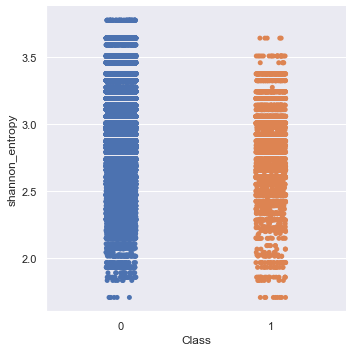

In [41]:
sns.catplot(x="Class", y="shannon_entropy", data=expanded_dataset)

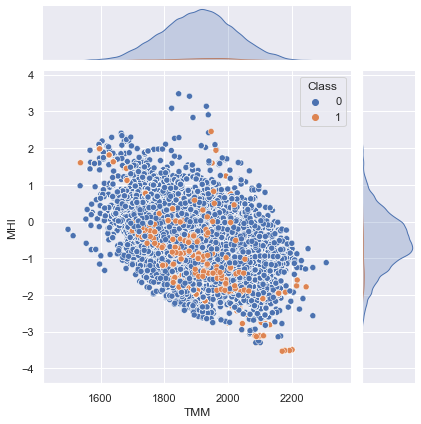

In [42]:
sns.jointplot(data=expanded_dataset, x="TMM", y="MHI", hue="Class")

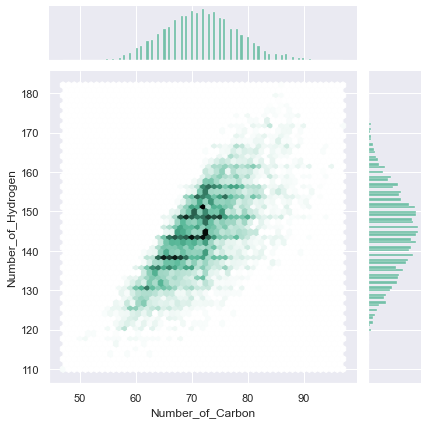

In [43]:
sns.jointplot(data = expanded_dataset, x="Number_of_Carbon", y="Number_of_Hydrogen", kind="hex", color="#4CB391")

All three plots above are catagorized by class 1 and class 0. The key attributes of dataset, which contains shannon_entropy, TMM, MHI. 